import pandas as pd
import os
# Defina o diretório onde seus arquivos CSV estão localizados
diretorio_csv = 'C:/Users/miche/Desktop/CAPSTONE/insper0924'

# Lista todos os arquivos na pasta
arquivos_csv = [arquivo for arquivo in os.listdir(diretorio_csv) if arquivo.lower().endswith('.csv')]

# Inicialize uma lista para armazenar os DataFrames
dataframes = []

# Leia cada arquivo CSV e adicione ao lista de DataFrames
for arquivo in arquivos_csv:
    caminho_completo = os.path.join(diretorio_csv, arquivo)
    df = pd.read_csv(caminho_completo)
    dataframes.append(df)

#load data bases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import prophet
from yahoofinancials import YahooFinancials
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA



In [2]:
#load db preco_anbima and then return the unique values of the column 'correcao'
preco_anbima = pd.read_csv('C:/Users/miche/Desktop/CAPSTONE/insper0924/preco_anbima_di_spread.csv')
print(preco_anbima['correcao'].unique())

['di_spread']


C:\Users\miche\AppData\Local\Temp\ipykernel_8800\3014466254.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  preco_anbima = pd.read_csv('C:/Users/miche/Desktop/CAPSTONE/insper0924/preco_anbima_di_spread.csv')


In [3]:
preco_anbima[['codigo', 'taxaCompra', 'taxaVenda', 'taxaIndicativa']].head()

,codigo,taxaCompra,taxaVenda,taxaIndicativa
0,AGGU12,1.0463,0.8881,0.9786
1,ALGA12,0.9485,0.4428,0.7353
2,ALGA16,1.0500,0.8000,0.9389
3,ALPA14,0.9418,0.4228,0.6945
4,AVIA13,0.8500,0.6520,0.7900


### Alterar os tipos de Campos das taxas no df

In [11]:
#tipos dos campos da tabela
preco_anbima.dtypes
#transformar taxaCompra, taxaVenda, taxaIndicativa, indice em float
preco_anbima['taxaCompra'] = preco_anbima['taxaCompra'].str.replace(',', '.').astype(float)
preco_anbima['taxaVenda'] = preco_anbima['taxaVenda'].str.replace(',', '.').astype(float)
preco_anbima['taxaIndicativa'] = preco_anbima['taxaIndicativa'].str.replace(',', '.').astype(float)
preco_anbima['indice'] = preco_anbima['indice'].str.replace(',', '.').astype(float)


AttributeError: Can only use .str accessor with string values!

In [5]:
#transformar os campos dataReferencia e repacVenc em datetime
preco_anbima['dataReferencia'] = pd.to_datetime(preco_anbima['dataReferencia'], format='%Y-%m-%d', errors='coerce')
preco_anbima['repacVenc'] = pd.to_datetime(preco_anbima['repacVenc'], format='%Y-%m-%d', errors='coerce')

### Criar novo campo Spred_bid_ask

In [6]:
#criar um novo campo chamado 'spread_bid_ask' que é a diferença entre 'taxaCompra' e 'taxaVenda'
preco_anbima['spread_bid_ask'] = preco_anbima['taxaCompra'] - preco_anbima['taxaVenda']

### SPREAD 1 = Spread_bid_ask / taxaIndicativa

In [7]:
#Criar um novo campo chamado spread 1 que e a diferenca entre Spread_bid_ask e taxaIndicativa
preco_anbima['spread'] = preco_anbima['spread_bid_ask'] - preco_anbima['taxaIndicativa']

### Criar novo campo Spread 2 que é a diferença entre o Spread_bid_ask e o indice

In [8]:
#Criar novo campo chamado Spread 2 que e a diferenca entre Spread_bid_ask e indice
preco_anbima['spread_2'] = preco_anbima['spread_bid_ask'] - preco_anbima['indice']

In [9]:
#contar o numero de linhas da tabela
print(preco_anbima.shape[0])

405925


## Remover registros nos quais os valores de taxaVenda e taxaCompra são iguais a zero

In [10]:
#remover todas as linhas que a taxaVenda e a TaxaCompra sejam iguais a zero
preco_anbima = preco_anbima[preco_anbima['taxaVenda'] != 0]
preco_anbima = preco_anbima[preco_anbima['taxaCompra'] != 0]
print(preco_anbima.count())

Unnamed: 0        380979
id                380979
dataReferencia    380979
codigo            380979
nome              380979
repacVenc         380979
indice            380979
correcao          380979
taxaCompra        380979
taxaVenda         380979
taxaIndicativa    380979
desvioPadrao      380979
intervaloMin      380979
intervaloMax      380979
pu                380979
percPu            380979
duration          380979
percReune         380979
referenciaNTNB    380979
spread_bid_ask    380979
spread            380979
spread_2          380979
dtype: int64


In [20]:
#guardar o novo dataframe em um arquivo csv
preco_anbima.to_csv('C:/Users/miche/Desktop/CAPSTONE/Capstone/preco_anbima_di_spread.csv', index=False)




### Para exemplificar vamos utilizar o codigo ALGA28 num periodo de 1 ano

### Rodar uma analise de correlacao entre as variaveis dentro do titulo ALGA28

## 1. Decomposição das séries de tempo
### Componentes:

- Tendência
- Sazonalidade
- Ruído


ConversionError: Failed to convert value(s) to axis units: array(['ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28',
       'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28', 'ALGA28'], dtype=object)

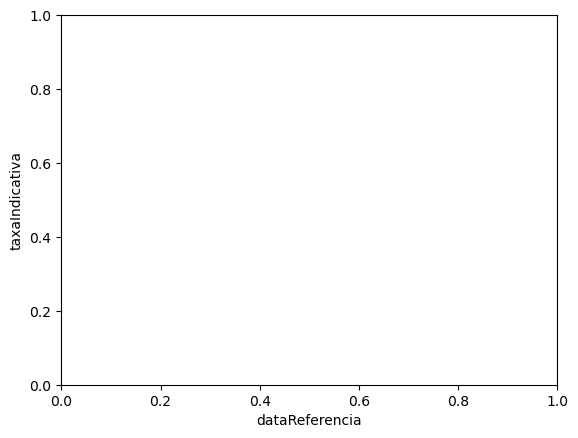

In [64]:
plt.xlabel('dataReferencia')
plt.ylabel('taxaIndicativa')
plt.plot(preco_anbima_ALGA28_2020)

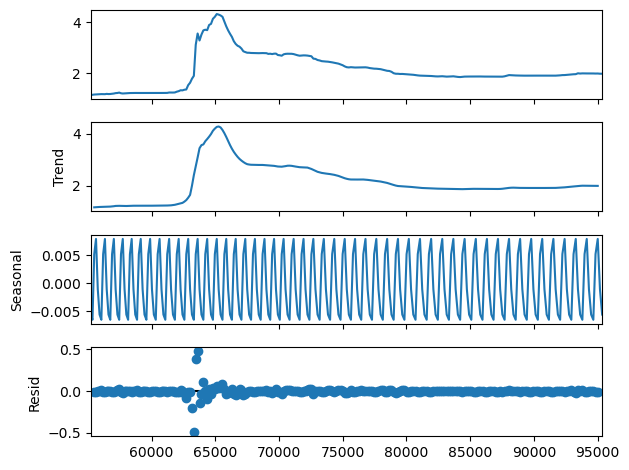

In [65]:
series = preco_anbima_ALGA28_2020[['taxaIndicativa']]
result = seasonal_decompose(series, model='additive',period=5)
result.plot()
plt.rcParams["figure.figsize"] = (9,5)
plt.show()

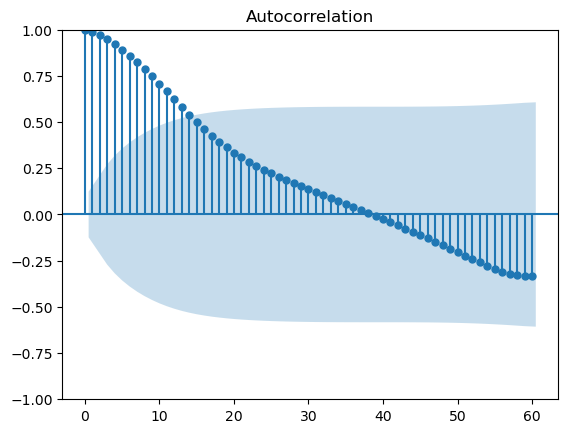

In [63]:
# autocorrelation and partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series, lags=60)
plt.show()